<a href="https://colab.research.google.com/github/hyehyuni/essa/blob/main/hw_0519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[과제 _ 개념정리]**

**범위 : 파이썬 머신러닝 완벽가이드 ch5. 4 pg. 303~310**


---

## **04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측** 


### 1) LinearRegression 클래스 - Ordinary Least Squares

LinearRegression 클래스는 예측값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스이다. 

In [2]:
# class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

<입력 파라미터>
* fit_intercept
  * intercept 값을 계산할 것인지 말지를 지정한다.
  * 불린 값으로, 디폴트는 True이다. 
* normalize
 * fit_intercept가 False인 경우에는 이 파라미터가 무시된다. 만일 True인 경우엔 회귀를 수행하기 전에 입력 데이터 세트를 정규화한다.
 * 불린 값으로 디폴트는 false이다. 

<속성>
* coef_ 
  * fit() 메서드를 수행했을 때 회귀계수가 배열 형태로 저장하는 속성
  * shape는 (target 값 개수, 피쳐 개수)
* intercept
 * intercept 값

- Ordinary Least square 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 
- 다중 공선성 : 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감
 - 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용
 - PCA를 통해 차원 축소를 수행 

### 2) 회귀 평가 지표 

회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로한 지표가 중심이다.

실제 값과 예측 값의 차이를 그냥 더하면 +와 -가 섞여서 오류가 상쇄된다. 

-> 이때문에 오류의 절댓값 평균이나 제곱, 제곱한 뒤 다시 루트를 씌운 평균값을 구한다. 

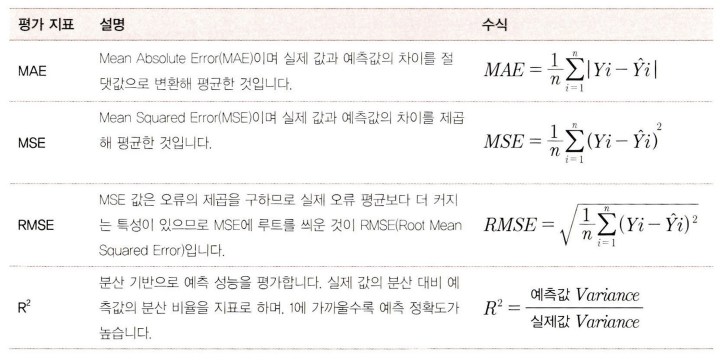

* 각 평가 방법에 대한 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가시 사용되는 scoring 파라미터의 적용값이다. 

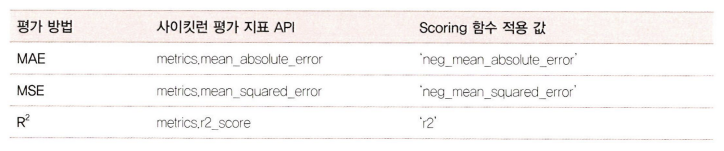

<주의사항> 

MAE의 scoring 파라미터를 보면 neg_라는 접두어가 붙어있음. 이는 음수 값을 가진다는 의미

=> 음수 값을 반환하는 이유는 사이킷런의 Socring 함수가 socre 값이 클수록 좋은 평가 결과로 자동 평가하기 때문이다. 그런데 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 보정해야함

=> 따라서 -1을 원래의 평가 지표 값에 곱해서 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 한다.

### 3) LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

* 피처에 대한 설명

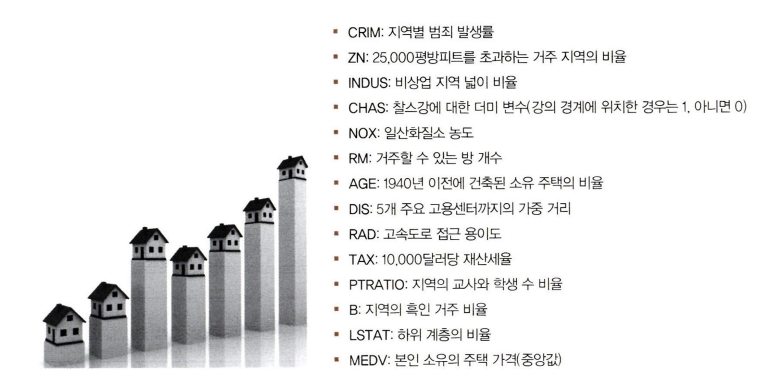



```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#boston 데이터 세트 로드
boston = load_boston()

#boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격임, 이를 PRICE 칼럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()
```



* 더이상 **from sklearn.datasets import load_boston**를 파이썬에서 지원하지 않음

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

In [29]:
feature_names=['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX'	,'PTRATIO',	'B'	,'LSTAT',	'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


=> 데이터 세트 피처의 Null 값은 없으며, 모두 float 형이다.

* 각 칼럼이 회귀 결과에 미치는 영향이 어느정도인지 시각화

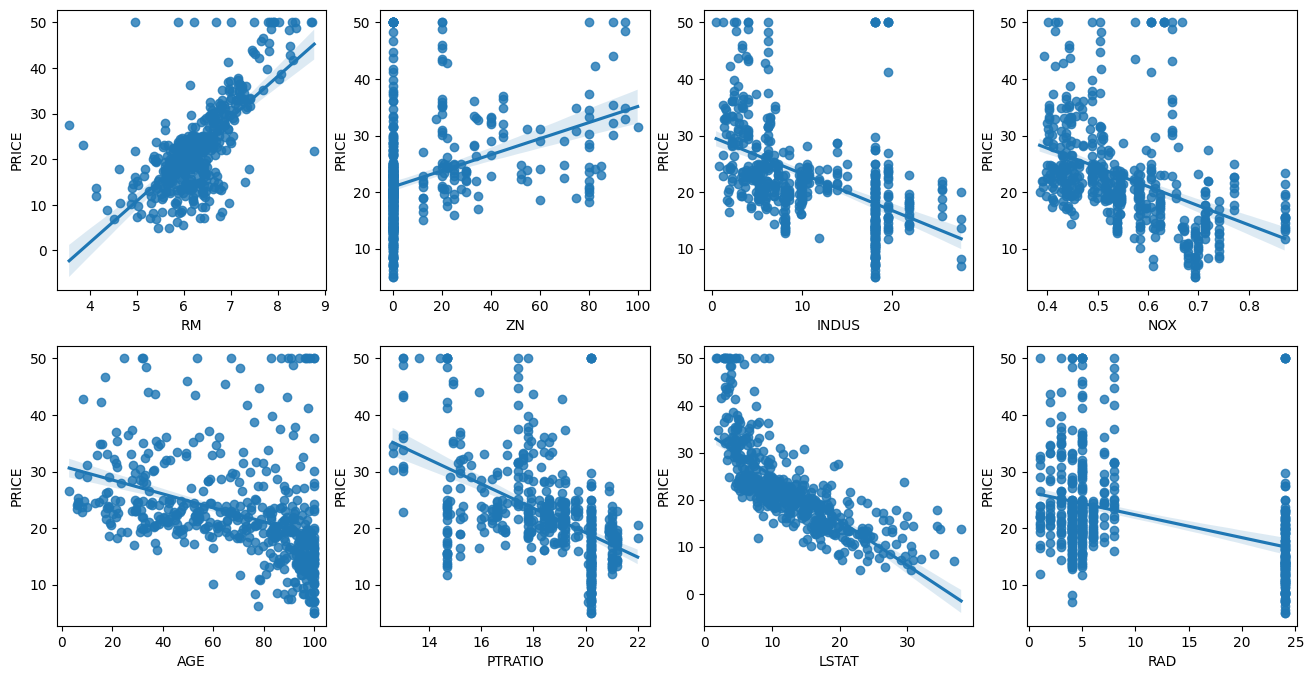

In [31]:
#2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4X2의 ax를 가짐
fig,axs=plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features=['RM','ZN', 'INDUS','NOX', 'AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row =int(i/4)
  col=i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

=> 다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다. 

=> RM은 양 방향의 선형성이 가장 크다. 즉 방의 크기가 클수록 가격이 증가하는 모습을 볼 수 있다. 

=> LSTAT은 음 방향의 선형성이 가장 크다. LSTAT이 적을수록 PRICE가 증가하는 모습이 확연히 나타난다. 

* 회귀 모델 만들기

In [32]:
#회귀 모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis =1,inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE : {0:.3f}, RMSE :{1:.3F}'.format(mse,rmse))
print('Varance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE :4.159
Varance score : 0.757


* 절편과 회귀 계수 값 확인

In [33]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


* 피처별 회귀 계수 값 매핑 + 높은 순으로 출력

In [34]:
coeff=pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

=> RM이 양의 값으로 회귀ㅡ 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커보인다. 

* 5개의 폴트 세트에서 cross_val_socre()를 이용해 교차검증으로 MSE와 RMSE를 측정 

In [35]:
from sklearn.model_selection import cross_val_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr=LinearRegression()

#cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores=cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores) # -1을 곱함에 유의 
avg_rmse=np.mean(rmse_scores)

#cross_val_score(scoring="net_mean_squared_error")로 변환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE: {0:.3f}',format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: {0:.3f} 5.828658946215802


=> 5개 폴드 세트에 대해서 교차 검증을 수행한 결과, 평균 RMSE는 약 5.83이 나왔다.